In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


# Define the ticker symbol for Saudi Aramco
ticker_symbol = "2222.SR"  # Use "2222.SR" for Saudi Aramco on the Saudi Stock Exchange

# Define the start date and today's date
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")  # Today's date

# Fetch the stock data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Check dataset shape
print("Shape of the dataset:", data.shape)

# Display the first few rows of the data
print("First few rows of the dataset:")
print(data.head())

# Check data types
print("Data types of columns:")
print(data.dtypes)


[*********************100%***********************]  1 of 1 completed

Shape of the dataset: (1249, 6)
First few rows of the dataset:
Price       Adj Close      Close       High        Low       Open    Volume
Ticker        2222.SR    2222.SR    2222.SR    2222.SR    2222.SR   2222.SR
Date                                                                       
2020-01-01  24.489634  29.008265  29.132231  28.966942  29.132231   8517342
2020-01-02  24.524517  29.049585  29.132231  28.966942  29.008265  11430744
2020-01-05  24.105890  28.553719  28.925619  28.512396  28.925619  25239125
2020-01-06  24.071011  28.512396  28.553719  28.140495  28.512396  23401835
2020-01-07  23.966352  28.388430  28.553719  28.223141  28.471073  13923075
Data types of columns:
Price      Ticker 
Adj Close  2222.SR    float64
Close      2222.SR    float64
High       2222.SR    float64
Low        2222.SR    float64
Open       2222.SR    float64
Volume     2222.SR      int64
dtype: object


In [2]:
# Reset the index to include 'Date' as a column (if necessary)
if 'Date' not in data.columns:
    data.reset_index(inplace=True)

# Convert 'Date' column to a valid Datetime format (just to ensure consistency)
data["Date"] = pd.to_datetime(data["Date"])

# Check the first few rows after processing
print("First few rows after resetting index and processing 'Date' column:")
print(data.head())

# Check data types again
print("Data types after processing:")
print(data.dtypes)



First few rows after resetting index and processing 'Date' column:
Price        Date  Adj Close      Close       High        Low       Open  \
Ticker               2222.SR    2222.SR    2222.SR    2222.SR    2222.SR   
0      2020-01-01  24.489634  29.008265  29.132231  28.966942  29.132231   
1      2020-01-02  24.524517  29.049585  29.132231  28.966942  29.008265   
2      2020-01-05  24.105890  28.553719  28.925619  28.512396  28.925619   
3      2020-01-06  24.071011  28.512396  28.553719  28.140495  28.512396   
4      2020-01-07  23.966352  28.388430  28.553719  28.223141  28.471073   

Price     Volume  
Ticker   2222.SR  
0        8517342  
1       11430744  
2       25239125  
3       23401835  
4       13923075  
Data types after processing:
Price      Ticker 
Date                  datetime64[ns]
Adj Close  2222.SR           float64
Close      2222.SR           float64
High       2222.SR           float64
Low        2222.SR           float64
Open       2222.SR           float

## Now we want to visualize the data

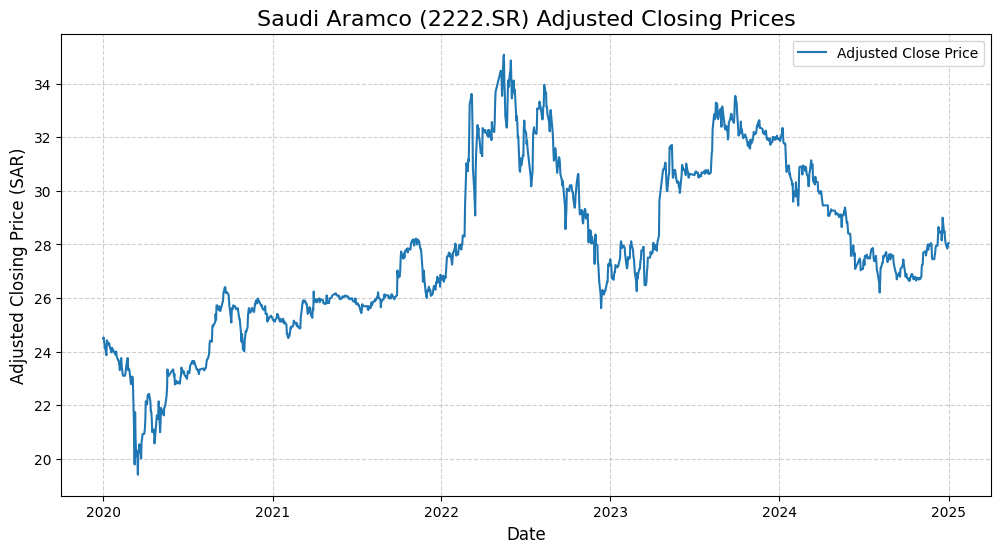

In [3]:
# Plot the adjusted closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Adj Close"], label="Adjusted Close Price", linestyle="-", linewidth=1.5)
plt.title(f"Saudi Aramco ({ticker_symbol}) Adjusted Closing Prices", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Closing Price (SAR)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


**The second part- Data preprocessing **

In [4]:
# Import necessary libraries and modules
import pandas as pd
import yfinance as yf

# Define the ticker symbol for Saudi Aramco
ticker_symbol = "2222.SR"

# Define the start and end dates
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")

# Fetch data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Reset the index to include the Date as a column
data.reset_index(inplace=True)

# Check dataset shape
print("Dataset shape:", data.shape)

# Display the first few rows
print("Dataset head:")
print(data.head())

# Display column types
print("Column types:")
print(data.dtypes)


[*********************100%***********************]  1 of 1 completed

Dataset shape: (1249, 7)
Dataset head:
Price        Date  Adj Close      Close       High        Low       Open  \
Ticker               2222.SR    2222.SR    2222.SR    2222.SR    2222.SR   
0      2020-01-01  24.489634  29.008265  29.132231  28.966942  29.132231   
1      2020-01-02  24.524517  29.049585  29.132231  28.966942  29.008265   
2      2020-01-05  24.105890  28.553719  28.925619  28.512396  28.925619   
3      2020-01-06  24.071011  28.512396  28.553719  28.140495  28.512396   
4      2020-01-07  23.966352  28.388430  28.553719  28.223141  28.471073   

Price     Volume  
Ticker   2222.SR  
0        8517342  
1       11430744  
2       25239125  
3       23401835  
4       13923075  
Column types:
Price      Ticker 
Date                  datetime64[ns]
Adj Close  2222.SR           float64
Close      2222.SR           float64
High       2222.SR           float64
Low        2222.SR           float64
Open       2222.SR           float64
Volume     2222.SR             int64
dty

**Define Features and Split the Dataset**




In [5]:
# Convert Date column to a valid Datetime format and make it timezone-naive
data["Date"] = pd.to_datetime(data["Date"]).dt.tz_localize(None)

# Define selected features and target attribute
features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
target = "Open"

# Define start and end time for each period
train_end_date = pd.to_datetime("2022-12-31")  # Training: 2020-01-01 to 2022-12-31
validate_start_date = pd.to_datetime("2023-01-01")
validate_end_date = pd.to_datetime("2023-06-30")  # Validation: 2023-01-01 to 2023-06-30
test_start_date = pd.to_datetime("2023-07-01")  # Testing: 2023-07-01 onward

# Split dataset into training, validation, and testing
data_train = data[data["Date"] <= train_end_date][features]
data_train_dates = data[data["Date"] <= train_end_date]["Date"]
data_validate = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)][features]
data_validate_dates = data[(data["Date"] >= validate_start_date) & (data["Date"] <= validate_end_date)]["Date"]
data_test = data[data["Date"] >= test_start_date][features]
data_test_dates = data[data["Date"] >= test_start_date]["Date"]

# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")




Training Set: (749, 6)
Validation Set: (119, 6)
Testing Set: (381, 6)


Now, we want to compute the ratio of the dataset split. Usually in such a tasks, we have division of Training, Validation and Test sets of 70-15-15 ratio.
 Here, we have slightly changed proportion, but still our training set is the largest, to make sure our NN has enough data to capture the pattern, and test set is larger than validation set to ensure if our model is good in predicting the output.

In [6]:
# Total number of rows in the dataset
total_rows = data.shape[0]

# Count the rows in each dataset
train_rows = data_train.shape[0]
validate_rows = data_validate.shape[0]
test_rows = data_test.shape[0]

# Calculate proportions
train_proportion = train_rows / total_rows
validate_proportion = validate_rows / total_rows
test_proportion = test_rows / total_rows

print(f"Training Set Proportion: {train_proportion:.2%}")
print(f"Validation Set Proportion: {validate_proportion:.2%}")
print(f"Testing Set Proportion: {test_proportion:.2%}")


Training Set Proportion: 59.97%
Validation Set Proportion: 9.53%
Testing Set Proportion: 30.50%


**Snippet 3: Visualize Data Splits**

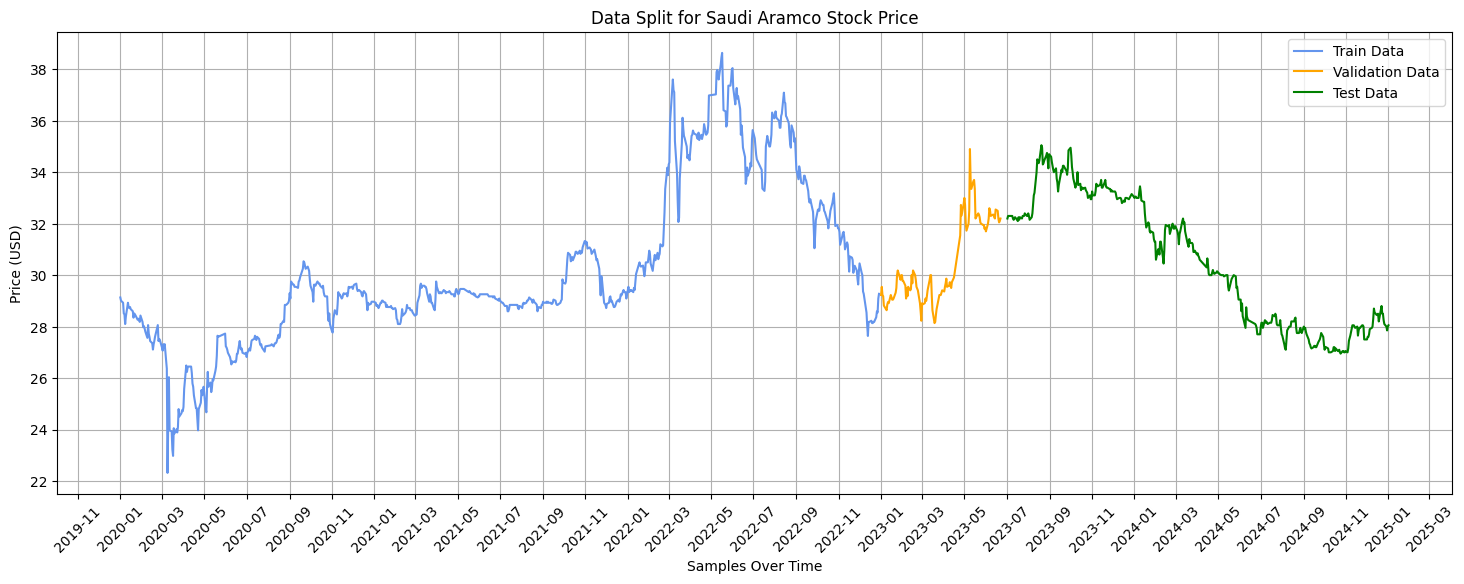

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot stock prices for each data split
plt.figure(figsize=(18, 6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue", label="Train Data")
plt.plot(data_validate_dates, data_validate["Open"], color="orange", label="Validation Data")
plt.plot(data_test_dates, data_test["Open"], color="green", label="Test Data")
plt.legend()
plt.title("Data Split for Saudi Aramco Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()
plt.show()


**Step 4: Feature Scaling**

In [8]:
from sklearn.preprocessing import MinMaxScaler
import joblib
import os

# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the scaler to the training set
data_train_scaled = sc.fit_transform(data_train)

# Transform validation and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "saudi_aramco_stock_price_scaler.gz"

# Ensure the directory exists
if not os.path.exists(scaler_model_location):
    os.makedirs(scaler_model_location)

# Save the scaler model
joblib.dump(sc, scaler_model_location + scaler_model_name)

print("Scaler model saved successfully.")



Scaler model saved successfully.


**Step 5: Combine Dates and Save Datasets**

In [9]:
import os

# Combine dates with scaled datasets
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features)
data_test_scaled_final["Date"] = data_test_dates.values

# Prepare datasets files and location
data_file_location = "..//data//processed//"
data_file_name_train = "saudi_aramco_stock_price_processed_train.csv"
data_file_name_validate = "saudi_aramco_stock_price_processed_validate.csv"
data_file_name_test = "saudi_aramco_stock_price_processed_test.csv"

# Ensure the directory exists
if not os.path.exists(data_file_location):
    os.makedirs(data_file_location)

# Save datasets
data_train_scaled_final.to_csv(data_file_location + data_file_name_train, index=None)
data_validate_scaled_final.to_csv(data_file_location + data_file_name_validate, index=None)
data_test_scaled_final.to_csv(data_file_location + data_file_name_test, index=None)

print("Processed datasets saved successfully.")



Processed datasets saved successfully.


**Model Training**

In [10]:
# Import necessary libraries and modules
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from keras.callbacks import ModelCheckpoint


In [11]:
features = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]


In [12]:
# Define a method to construct input and target data for LSTM
def construct_lstm_data(data, sequence_size, target_attr_idx):
    """
    Construct input data (X) and target data (Y) for LSTM model.

    Parameters:
    -----------
    data : numpy.ndarray
        Input data array of shape (n_samples, n_features).
    sequence_size : int
        Number of previous time steps to use as input features for predicting the next time step.
    target_attr_idx : int
        Index of the target column (e.g., 0 for "Open").

    Returns:
    --------
    data_X : numpy.ndarray
        LSTM input sequences of shape (n_samples - sequence_size, sequence_size, n_features).
    data_y : numpy.ndarray
        Target values of shape (n_samples - sequence_size,).
    """
    data_X, data_y = [], []
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i, :])
        data_y.append(data[i, target_attr_idx])
    return np.array(data_X), np.array(data_y)


In [13]:
# Define sequence size and target attribute index
sequence_size = 10  # 10 days
target_attr_idx = 0  # "Open" is our target column

# Construct LSTM input and output for training, validation, and testing
X_train, y_train = construct_lstm_data(data_train_scaled, sequence_size, target_attr_idx)
X_validate, y_validate = construct_lstm_data(data_validate_scaled, sequence_size, target_attr_idx)
X_test, y_test = construct_lstm_data(data_test_scaled, sequence_size, target_attr_idx)

# Display shapes of the datasets
print(f"Training X Shape: {X_train.shape}, Y Shape: {y_train.shape}")
print(f"Validation X Shape: {X_validate.shape}, Y Shape: {y_validate.shape}")
print(f"Testing X Shape: {X_test.shape}, Y Shape: {y_test.shape}")


Training X Shape: (739, 10, 6), Y Shape: (739,)
Validation X Shape: (109, 10, 6), Y Shape: (109,)
Testing X Shape: (371, 10, 6), Y Shape: (371,)


**Step 5: Training LSTM Model**

In [14]:
# Initializing the model
regressor = Sequential()

# Add input layer
regressor.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add first LSTM layer and dropout regularization layer
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Add second LSTM layer and dropout regularization layer
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Add third LSTM layer and dropout regularization layer
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(rate=0.2))

# Add fourth LSTM layer and dropout regularization layer
regressor.add(LSTM(units=100))
regressor.add(Dropout(rate=0.2))

# Add last dense layer/output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer="adam", loss="mean_squared_error")


**Training the Model**

In [15]:
# Define model checkpoint to save the best performing model
model_location = "..//models//"
model_name = "saudi_aramco_stock_price_lstm.model.keras"

best_model_checkpoint_callback = ModelCheckpoint(
    filepath=model_location + model_name,
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1  # Displays progress during training
)

# Train the model
history = regressor.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_validate, y_validate),
    epochs=200,
    batch_size=64,
    callbacks=[best_model_checkpoint_callback]
)





Epoch 1/200
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1524
Epoch 1: val_loss improved from inf to 0.02305, saving model to ..//models//saudi_aramco_stock_price_lstm.model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.1410 - val_loss: 0.0231
Epoch 2/200
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0194
Epoch 2: val_loss improved from 0.02305 to 0.00375, saving model to ..//models//saudi_aramco_stock_price_lstm.model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0188 - val_loss: 0.0037
Epoch 3/200
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0087
Epoch 3: val_loss did not improve from 0.00375
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0088 - val_loss: 0.0045
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0065
Epoch 4: val_loss did not improve from 0.00375
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0065 - val_loss: 0.0040
Epoch 5/200
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0052
Epoch 5: val_loss improved fro

**Visualizing Training Performance**

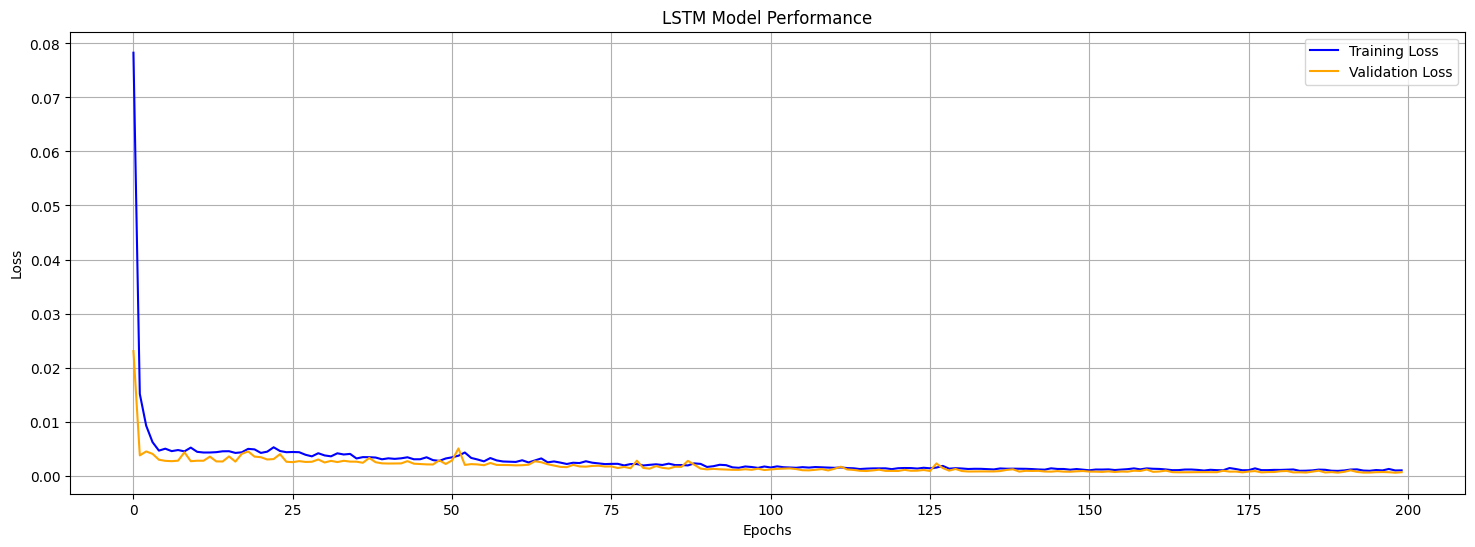

In [16]:
# Plot training and validation loss
plt.figure(figsize=(18, 6))
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


As we might notice, our training error alongside with the validation error decreases within the

# 6. MODEL INFERENCE

In [17]:
# Prepare model location and name
model_location = "..//models//"
model_name = "saudi_aramco_stock_price_lstm.model.keras"  # Updated to match the previous code

# Load the best performing model
from tensorflow.keras.models import load_model
best_model = load_model(model_location + model_name)

print(f"Best model loaded successfully from: {model_location + model_name}")



Best model loaded successfully from: ..//models//saudi_aramco_stock_price_lstm.model.keras


# Model Prediction

In [18]:
# Predict stock price for all data splits
y_train_predict = best_model.predict(X_train)
y_validate_predict = best_model.predict(X_validate)
y_test_predict = best_model.predict(X_test)

print("Predictions completed for training, validation, and testing datasets.")


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions completed for training, validation, and testing datasets.


# Inverse Scaling

In [19]:
# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "saudi_aramco_stock_price_scaler"  # Updated to match the project
scaler_model_ext = "gz"

# Load the scaler model used during preprocessing
sc = joblib.load(scaler_model_location + scaler_model_name + "." + scaler_model_ext)

print(f"Scaler loaded successfully from: {scaler_model_location + scaler_model_name + '.' + scaler_model_ext}")


Scaler loaded successfully from: ..//models//saudi_aramco_stock_price_scaler.gz


In [20]:
# Restore actual distribution for predicted prices
y_train_inv = sc.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.ones((len(y_train.reshape(-1, 1)), 5))), axis=1)
)[:, 0]

y_validate_inv = sc.inverse_transform(
    np.concatenate((y_validate.reshape(-1, 1), np.ones((len(y_validate.reshape(-1, 1)), 5))), axis=1)
)[:, 0]

y_test_inv = sc.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.ones((len(y_test.reshape(-1, 1)), 5))), axis=1)
)[:, 0]

y_train_predict_inv = sc.inverse_transform(
    np.concatenate((y_train_predict, np.ones((len(y_train_predict), 5))), axis=1)
)[:, 0]

y_validate_predict_inv = sc.inverse_transform(
    np.concatenate((y_validate_predict, np.ones((len(y_validate_predict), 5))), axis=1)
)[:, 0]

y_test_predict_inv = sc.inverse_transform(
    np.concatenate((y_test_predict, np.ones((len(y_test_predict), 5))), axis=1)
)[:, 0]

print("Inverse scaling completed for actual and predicted prices.")


Inverse scaling completed for actual and predicted prices.


In [21]:
# Define chart colors
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
test_actual_color = "green"
train_predicted_color = "lightblue"
validate_predicted_color = "peru"
test_predicted_color = "limegreen"

print("Chart colors defined successfully for actual and predicted data.")


Chart colors defined successfully for actual and predicted data.


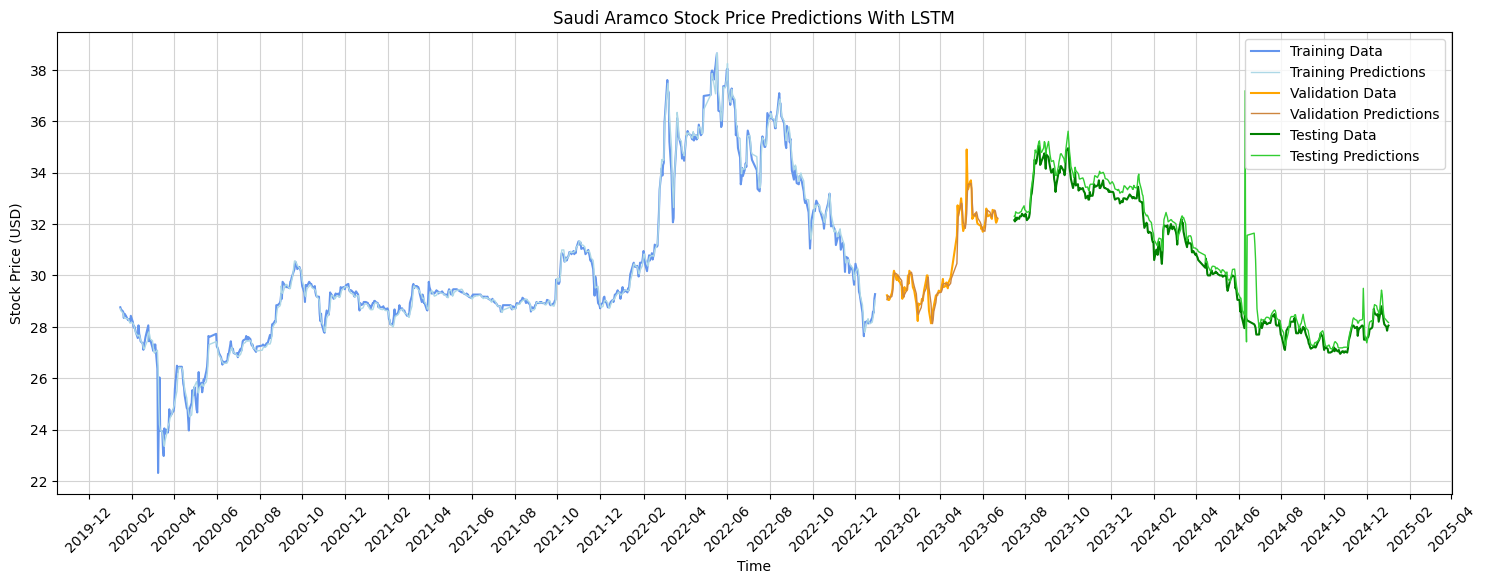

In [22]:
# Align testing dates with testing predictions
aligned_data_test_dates = data_test_dates[sequence_size:]

# Plot actual and predicted prices
plt.figure(figsize=(18, 6))

# Training data
plt.plot(data_train_dates[sequence_size:], y_train_inv, label="Training Data", color=train_actual_color)
plt.plot(data_train_dates[sequence_size:], y_train_predict_inv, label="Training Predictions", linewidth=1, color=train_predicted_color)

# Validation data
plt.plot(data_validate_dates[sequence_size:], y_validate_inv, label="Validation Data", color=validate_actual_color)
plt.plot(data_validate_dates[sequence_size:], y_validate_predict_inv, label="Validation Predictions", linewidth=1, color=validate_predicted_color)

# Testing data
plt.plot(aligned_data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color)
plt.plot(aligned_data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=1, color=test_predicted_color)

# Plot titles and labels
plt.title("Saudi Aramco Stock Price Predictions With LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")

# Format the x-axis for date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Add legend and grid
plt.legend()
plt.grid(color="lightgray")

# Show the plot
plt.show()



# Numerical evaluation of the Model Accuracy

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics for Training Data
mae_train = mean_absolute_error(y_train_inv, y_train_predict_inv)
mse_train = mean_squared_error(y_train_inv, y_train_predict_inv)
rmse_train = np.sqrt(mse_train)

# Calculate metrics for Validation Data
mae_validate = mean_absolute_error(y_validate_inv, y_validate_predict_inv)
mse_validate = mean_squared_error(y_validate_inv, y_validate_predict_inv)
rmse_validate = np.sqrt(mse_validate)

# Calculate metrics for Testing Data
mae_test = mean_absolute_error(y_test_inv, y_test_predict_inv)
mse_test = mean_squared_error(y_test_inv, y_test_predict_inv)
rmse_test = np.sqrt(mse_test)

# Display the results
print("Training Metrics:")
print(f"MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}")

print("\nValidation Metrics:")
print(f"MAE: {mae_validate:.4f}, MSE: {mse_validate:.4f}, RMSE: {rmse_validate:.4f}")

print("\nTesting Metrics:")
print(f"MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}")


Training Metrics:
MAE: 0.1702, MSE: 0.0870, RMSE: 0.2950

Validation Metrics:
MAE: 0.2351, MSE: 0.1437, RMSE: 0.3791

Testing Metrics:
MAE: 0.3654, MSE: 0.4391, RMSE: 0.6627


# Calculating $R^2$

In [24]:
from sklearn.metrics import r2_score

# Calculate R² scores
r2_train = r2_score(y_train_inv, y_train_predict_inv)
r2_validate = r2_score(y_validate_inv, y_validate_predict_inv)
r2_test = r2_score(y_test_inv, y_test_predict_inv)

# Display R² scores
print("R² Scores:")
print(f"Training R²: {r2_train:.4f}")
print(f"Validation R²: {r2_validate:.4f}")
print(f"Testing R²: {r2_test:.4f}")


R² Scores:
Training R²: 0.9907
Validation R²: 0.9432
Testing R²: 0.9309


In [25]:
# Calculate percentage difference for each data split
train_diff_percentage = 100 * abs((y_train_predict_inv - y_train_inv) / y_train_inv)
validate_diff_percentage = 100 * abs((y_validate_predict_inv - y_validate_inv) / y_validate_inv)
test_diff_percentage = 100 * abs((y_test_predict_inv - y_test_inv) / y_test_inv)

# Display average percentage difference for each split
print(f"Average Percentage Difference:")
print(f"Training Data: {train_diff_percentage.mean():.2f}%")
print(f"Validation Data: {validate_diff_percentage.mean():.2f}%")
print(f"Testing Data: {test_diff_percentage.mean():.2f}%")

# Optional
import pandas as pd

results = pd.DataFrame({
    "Dataset": ["Training", "Validation", "Testing"],
    "Average Percentage Difference (%)": [
        train_diff_percentage.mean(),
        validate_diff_percentage.mean(),
        test_diff_percentage.mean()
    ]
})

# Display the results
print(results)



Average Percentage Difference:
Training Data: 0.58%
Validation Data: 0.76%
Testing Data: 1.20%
      Dataset  Average Percentage Difference (%)
0    Training                           0.575695
1  Validation                           0.762874
2     Testing                           1.201918
